In [ ]:
#keras and Tensorflow >2.0

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt




In [24]:
df=pdr.get_data_tiingo('AAPL',api_key="576a3eb71590fe6808cd2a75620aac930ae49e5e")
df.tail()

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_15760\1773163025.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key="576a3eb71590fe6808cd2a75620aac930ae49e5e")


close     high     low     open    volume  \
symbol date                                                                    
AAPL   2023-11-09 00:00:00+00:00  182.41  184.120  181.81  182.960  53763540   
       2023-11-10 00:00:00+00:00  186.40  186.565  183.53  183.970  66177922   
       2023-11-13 00:00:00+00:00  184.80  186.030  184.21  185.820  43627519   
       2023-11-14 00:00:00+00:00  187.44  188.110  186.30  187.700  60108378   
       2023-11-15 00:00:00+00:00  188.01  189.500  187.78  187.845  53790499   

                                    adjClose    adjHigh      adjLow  \
symbol date                                                           
AAPL   2023-11-09 00:00:00+00:00  182.175439  183.88324  181.576211   
       2023-11-10 00:00:00+00:00  186.400000  186.56500  183.530000   
       2023-11-13 00:00:00+00:00  184.800000  186.03000  184.210000   
       2023-11-14 00:00:00+00:00  187.440000  188.11000  186.300000   
       2023-11-15 00:00:00+00:00  188.010000  189.50000  187.780000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2023-11-09 00:00:00+00:00  182.724732   53763540     0.00          1.0  
       2023-11-10 00:00:00+00:00  183.970000   66177922     0.24          1.0  
       2023-11-13 00:00:00+00:00  185.820000   43627519     0.00          1.0  
       2023-11-14 00:00:00+00:00  187.700000   60108378     0.00          1.0  
       2023-11-15 00:00:00+00:00  187.845000   53790499     0.00          1.0

In [25]:
df.to_csv("AAPL.csv")

In [26]:
df=pd.read_csv("AAPL.csv")

In [27]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-11-19 00:00:00+00:00,185.86,190.700,184.99,190.000,41920872,44.596212,45.757547,44.387460,45.589585,167683488,0.00,1.0
1,AAPL,2018-11-20 00:00:00+00:00,176.98,181.470,175.51,178.370,67825247,42.465499,43.542853,42.112779,42.799023,271300988,0.00,1.0
2,AAPL,2018-11-21 00:00:00+00:00,176.78,180.270,176.55,179.730,31124210,42.417510,43.254919,42.362322,43.125348,124496840,0.00,1.0
3,AAPL,2018-11-23 00:00:00+00:00,172.29,176.595,172.10,174.940,23623972,41.340156,42.373120,41.294566,41.976011,94495888,0.00,1.0
4,AAPL,2018-11-26 00:00:00+00:00,174.62,174.950,170.26,174.240,44998520,41.899228,41.978410,40.853067,41.808049,179994080,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,AAPL,2023-11-09 00:00:00+00:00,182.41,184.120,181.81,182.960,53763540,182.175439,183.883240,181.576211,182.724732,53763540,0.00,1.0
1252,AAPL,2023-11-10 00:00:00+00:00,186.40,186.565,183.53,183.970,66177922,186.400000,186.565000,183.530000,183.970000,66177922,0.24,1.0
1253,AAPL,2023-11-13 00:00:00+00:00,184.80,186.030,184.21,185.820,43627519,184.800000,186.030000,184.210000,185.820000,43627519,0.00,1.0
1254,AAPL,2023-11-14 00:00:00+00:00,187.44,188.110,186.30,187.700,60108378,187.440000,188.110000,186.300000,187.700000,60108378,0.00,1.0


In [30]:
df1=df.reset_index()["close"]

In [31]:
df1.shape

(1256,)

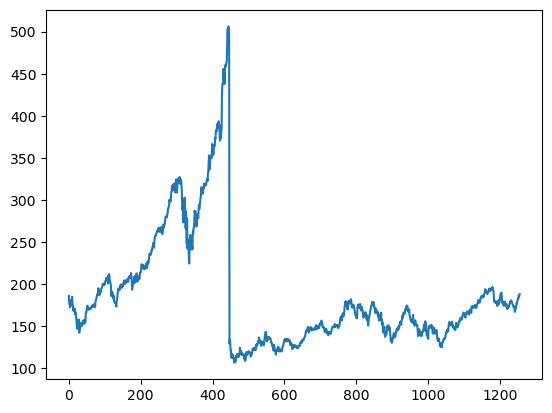

In [32]:
plt.plot(df1)

In [35]:
#LSTM are very sensitive to scale of data , hence we gonna use minmax scaler (i.e we are preprocessing data )

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
df1.shape

(1256, 1)

In [38]:
df1

array([[0.1979211 ],
       [0.1756794 ],
       [0.17517846],
       ...,
       [0.19526612],
       [0.20187852],
       [0.2033062 ]])

In [43]:
#Now we gonna divide data into train and test sets ...There are various methods of doing this like cross validation, Random seed etc in case of regression or classification problem 
#But in case of time series data there are different methods of doing ...ike first hundred days as features and 101th day as result and so on ...

In [44]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1), :1]

In [51]:
#convert an array of values into a dataset matrix (creating a method)

def create_dataset(dataset,time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]    #i=0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [52]:
# reshape into X=t, t+1,t+2,t+3 and Y=t+4

time_step=100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test= create_dataset(test_data,time_step)

In [53]:
print(X_train.shape), print (y_train.shape)  #just checking

(715, 100)
(715,)


(None, None)

In [54]:
print(X_test.shape), print (y_test.shape)  #just checking

(339, 100)
(339,)


(None, None)

In [59]:
# Now data preprocessing is done , Now as required for LSTM that we need to reshape X_train and X_testinto 3-dimensions
#[samples,time steps, feataures]

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [63]:
### Creating STACKED LSTM MOdel

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [64]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

12/12 [==============================] - 11s 334ms/step - loss: 0.0457 - val_loss: 0.0017
Epoch 2/100
12/12 [==============================] - 2s 142ms/step - loss: 0.0154 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0127 - val_loss: 4.7867e-04
Epoch 4/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0094 - val_loss: 5.5462e-04
Epoch 5/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0093 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0081 - val_loss: 5.0277e-04
Epoch 7/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0067 - val_loss: 7.9068e-04
Epoch 8/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0058 - val_loss: 4.5319e-04
Epoch 9/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0051 - val_loss: 5.8117e-04
Epoch 10/100
12/12 [==============================] - 2s 136ms/st

12/12 [==============================] - 2s 134ms/step - loss: 0.0016 - val_loss: 2.3153e-04
Epoch 77/100
12/12 [==============================] - 2s 143ms/step - loss: 0.0013 - val_loss: 2.0446e-04
Epoch 78/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0010 - val_loss: 2.0610e-04
Epoch 79/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0012 - val_loss: 2.1467e-04
Epoch 80/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0011 - val_loss: 2.2408e-04
Epoch 81/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0031 - val_loss: 2.8033e-04
Epoch 82/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0012 - val_loss: 2.0592e-04
Epoch 83/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0022 - val_loss: 2.0073e-04
Epoch 84/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0016 - val_loss: 2.3702e-04
Epoch 85/100
12/12 [==============================] - 1s 12

In [68]:
#Lets do the prediction now as machine is trained 

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 30ms/step


In [69]:
## Transform baack to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [75]:
## calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

226.93665205628065

In [76]:
#Test data rMSE
math.sqrt(mean_squared_error(y_test,test_predict))


169.19372651907722

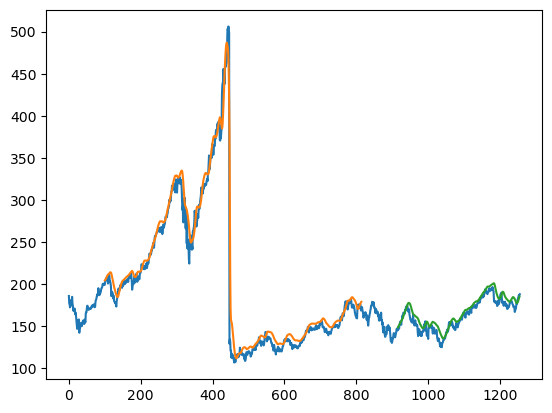

In [74]:
### Plotting 

# Shift train predictions for plotting 

look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#Shift train predictions for plotting 

testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()